In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random as rnd
import folium

<h3>Loading Data</h3>

In [2]:
property_data = pd.read_excel('cleaned_data.xlsx')

In [3]:
df = property_data.copy()

<h4>Reviewing a data object</h4>

In [4]:
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,2486,5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,5324,8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [5]:
for i in df.columns:
    print(i)

Property_Name
Property_id
Property_type
Property_status
Price_per_unit_area
Posted_On
Project_URL
builder_id
Builder_name
Property_building_status
City_id
City_name
No_of_BHK
Locality_ID
Locality_Name
Longitude
Latitude
Price
Size
Sub_urban_ID
Sub_urban_name
description
is_furnished
listing_domain_score
is_plot
is_RERA_registered
is_Apartment
is_ready_to_move
is_commercial_Listing
is_PentaHouse
is_studio
Listing_Category


Clean the fields and convert into int

In [6]:
# Price Size to float
df['Price'] = df['Price'].str.replace('[^\d.]', '', regex=True).astype(float)
df['Size'] = df['Size'].str.replace('[^\d.]', '', regex=True).astype(float)
df['No_of_BHK'] = df['No_of_BHK'].str.extract('(\d+)').astype(int)

In [7]:
ex_columns = ['No_of_BHK','Property_type','Price_per_unit_area','Price','Size']
print(df.loc[rnd.randint(0, len(df) - 1)][ex_columns])

No_of_BHK                      2
Property_type          Apartment
Price_per_unit_area         4200
Price                  3742200.0
Size                       891.0
Name: 65603, dtype: object


---------
---------

<h2>Part 1</h2>
<p>As investors have diverse budget limits, split the overall opportunities into
three different ranges. Analyze the distribution of the budget ranges (8 marks)</p>

--------------------

Setting the price ranges for categories (low, medium, high) based on the 25th and 75th percentiles of the price distribution.

In [8]:
# Check the data types of the columns and convert 'Price' to a numeric type
if df['Price'].dtype == 'O':
    # Remove non-numeric characters and convert the columns to numeric
    df['Price'] = df['Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# calculating quantiles for price
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

# now printing the ranges for low, medium and high budget ranges
print('Budget Range \t', 'Min Set Price', '\t-\t', 'Max Set Price')
print('----------------------------------------------------------')
print('Low Budget: \t', 0, '\t\t-\t', q1)
print('Medium Budget: \t', q1, '\t-\t', q3)
print('High Budget: \t', q3, '\t-\t', df['Price'].max())

# now adding a new column to the dataframe for categorical variable
df['Budget_Range'] = pd.cut(df['Price'], bins=[0, q1, q3, np.inf], labels=['Low', 'Medium', 'High'])

Budget Range 	 Min Set Price 	-	 Max Set Price
----------------------------------------------------------
Low Budget: 	 0 		-	 5259437.5
Medium Budget: 	 5259437.5 	-	 15498000.0
High Budget: 	 15498000.0 	-	 800000000.0


Graphing the Budget ranges

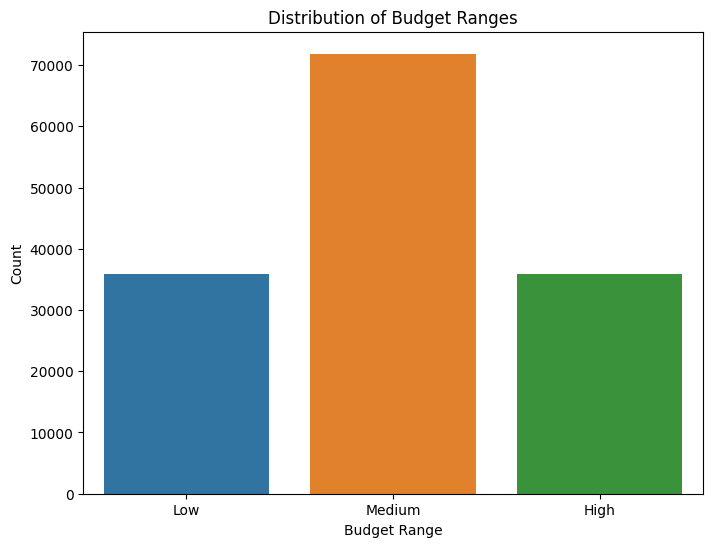

In [9]:
# Creating a histogram of the distribution of the budget ranges
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Budget_Range', order=['Low', 'Medium', 'High'])
plt.title('Distribution of Budget Ranges')
plt.xlabel('Budget Range')
plt.ylabel('Count')
plt.show()

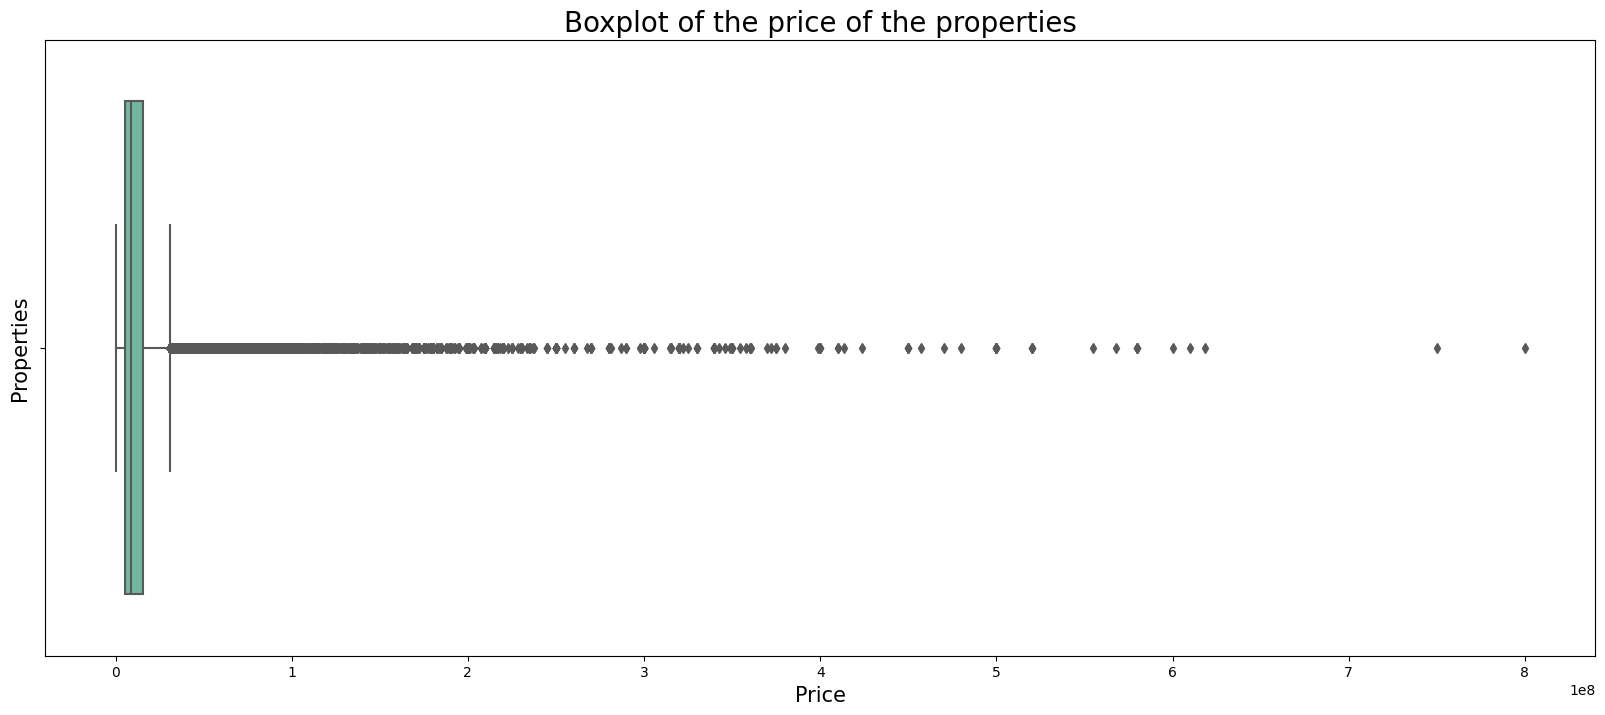

In [10]:
# Creating a boxplot for the price of the properties
plt.figure(figsize=(20, 8))
sns.boxplot(x='Price', data=df, orient='h', palette='Set2', whis=1.5)
plt.title('Boxplot of the price of the properties', fontsize=20)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Properties', fontsize=15)
plt.show()

----------------
------------------

<h2>Part 2</h2>
<p>Now since the budgets ranges are categorized , provide the investors with a
high level summary of the whole data using the budget range dimensions(7 marks)</p>

-----------

In [11]:
# Define colors for budget ranges
colors = {
    'Low': 'green',
    'Medium': 'yellow',
    'High': 'red'
}

<Figure size 1000x600 with 0 Axes>

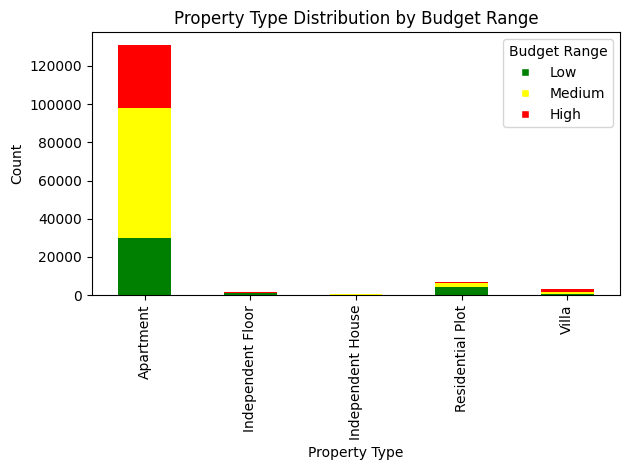

In [12]:
# Group the data by 'Property_type' and 'Budget_Range', and calculate the counts
property_budget_counts = df.groupby(['Property_type', 'Budget_Range']).size().unstack(fill_value=0)

# Create the stacked bar graph with custom colors
plt.figure(figsize=(10, 6))
property_budget_counts.plot(kind='bar', stacked=True, color=[colors[col] for col in property_budget_counts.columns])

# Customize the plot
plt.title('Property Type Distribution by Budget Range')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.legend(title='Budget Range')

# Create custom legend for color mapping
legend_labels = [plt.Line2D([0], [0], marker='s', color='w', label=label, markerfacecolor=colors[label]) for label in property_budget_counts.columns]
plt.legend(handles=legend_labels, title='Budget Range')

plt.tight_layout()
plt.show()

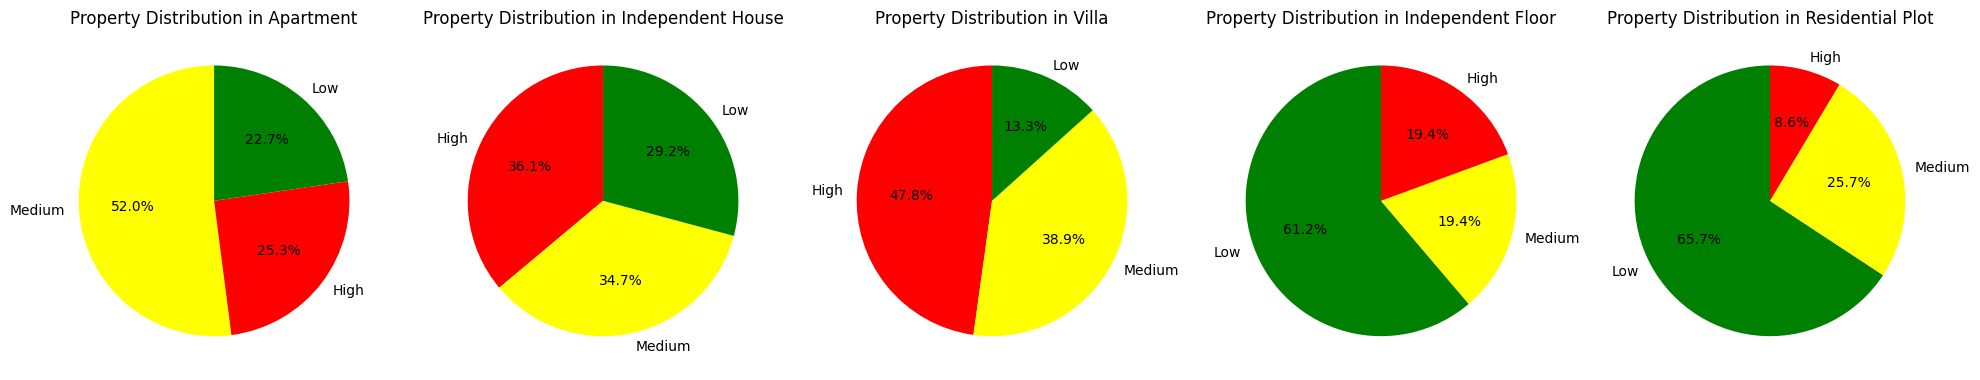

In [13]:
unique_cities = df['Property_type'].unique()

# Define the number of rows and columns for subplots
num_rows = 1
num_cols = 5

# Calculate the total number of subplots
num_subplots = num_rows * num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 12))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through cities and create pie charts for each
for i, city in enumerate(unique_cities):
    ax = axs[i]
    city_data = df[df['Property_type'] == city]
    budget_counts = city_data['Budget_Range'].value_counts()
    
     # Create a list of colors corresponding to each budget range
    pie_colors = [colors[budget_range] for budget_range in budget_counts.index]
    
    ax.pie(budget_counts, labels=budget_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)    
    ax.set_title(f'Property Distribution in {city}')
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Now seeing distribution in cities

<Figure size 1000x4000 with 0 Axes>

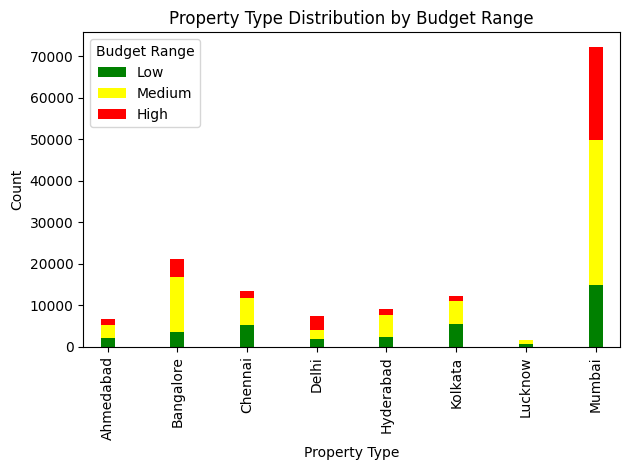

In [14]:
# Group the data by 'City_name' and 'Budget_Range', and calculate the counts
property_budget_counts = df.groupby(['City_name', 'Budget_Range']).size().unstack(fill_value=0)

# Create the grouped bar graph
plt.figure(figsize=(10, 40))
property_budget_counts.plot(kind='bar', width=0.2 ,color=colors, stacked=True)


# Customize the plot
plt.title('Property Type Distribution by Budget Range')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.legend(title='Budget Range')

plt.tight_layout()
plt.show()

Percentage of property in budget range pie graph for each city

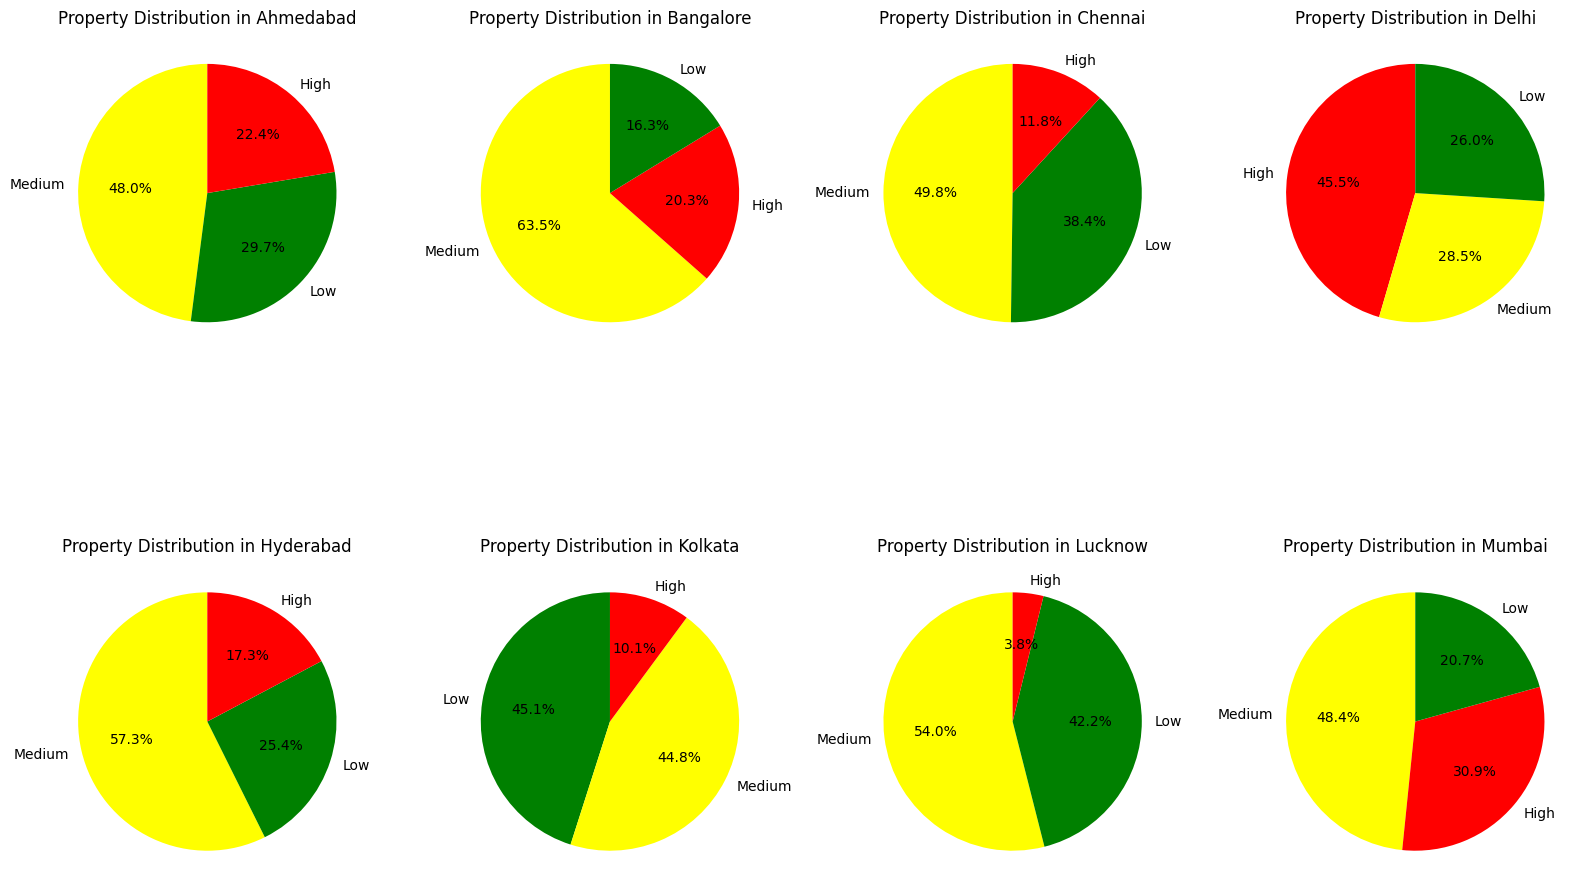

In [15]:
unique_cities = df['City_name'].unique()

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Calculate the total number of subplots
num_subplots = num_rows * num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through cities and create pie charts for each
for i, city in enumerate(unique_cities):
    ax = axs[i]
    city_data = df[df['City_name'] == city]
    budget_counts = city_data['Budget_Range'].value_counts()
    
     # Create a list of colors corresponding to each budget range
    pie_colors = [colors[budget_range] for budget_range in budget_counts.index]
    
    ax.pie(budget_counts, labels=budget_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)    
    ax.set_title(f'Property Distribution in {city}')
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [16]:
# # Create a pivot table that shows the mean 'Price_per_unit_area' for each 'Property_type' and 'Budget_Range'
# pivot_table = df.pivot_table(index='Property_type', columns='Budget_Range', values='Price_per_unit_area', aggfunc='mean')
# print("\nMean 'Price_per_unit_area' by 'Property_type' and 'Budget_Range':")
# print(pivot_table)

In [17]:
# Create a data cube
data_cube = df.pivot_table(
    index=['Budget_Range', 'Property_type'],
    values=['Price','Size'],
    aggfunc=np.mean
)

# Print the summary statistics
print(data_cube)

                                       Price         Size
Budget_Range Property_type                               
Low          Apartment          3.673897e+06   752.717661
             Independent Floor  2.804272e+06   737.487781
             Independent House  3.452779e+06   951.315175
             Residential Plot   2.804030e+06  1498.387154
             Villa              3.534147e+06   984.545861
Medium       Apartment          9.053216e+06  1102.224690
             Independent Floor  9.497444e+06  1258.429012
             Independent House  8.914668e+06  1737.967320
             Residential Plot   8.284064e+06  2284.843607
             Villa              1.033430e+07  1934.182796
High         Apartment          3.219986e+07  1806.791479
             Independent Floor  4.232313e+07  2457.996914
             Independent House  4.525787e+07  3582.022013
             Residential Plot   3.056168e+07  4742.991438
             Villa              4.500127e+07  3756.905743


---------------------------
--------------------------

<h2>Part 3</h2>
<p>Some investors want to compare and analyze the investment opportunities
in Hyderabad and bangalore . For instance, compare and analyze the size
and cost of houses that can be purchased in each of these cities. : 20 Marks</p>

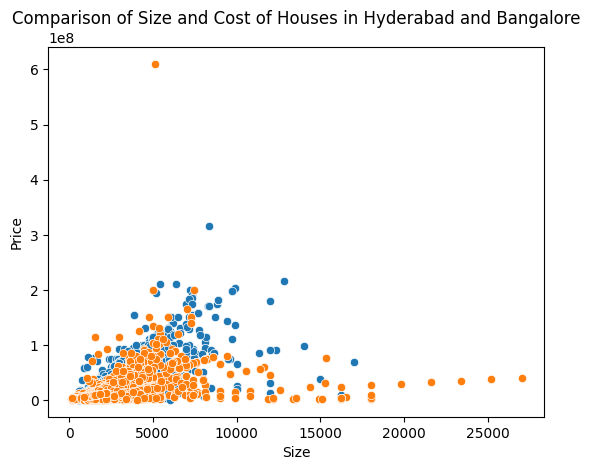

In [18]:
# Compare and analyze the size and cost of houses in Hyderabad and Bangalore
Hyderabad_df = df[df['City_name'] == 'Hyderabad']
Bangalore_df = df[df['City_name'] == 'Bangalore']
sns.scatterplot(data=Bangalore_df, x='Size', y='Price')
sns.scatterplot(data=Hyderabad_df, x='Size', y='Price')
plt.title('Comparison of Size and Cost of Houses in Hyderabad and Bangalore')
plt.show()

In [19]:
# Convert string to int using .loc indexer
Hyderabad_df.loc[:, 'Price_per_unit_area'] = pd.to_numeric(Hyderabad_df['Price_per_unit_area'], errors='coerce')
Bangalore_df.loc[:, 'Price_per_unit_area'] = pd.to_numeric(Bangalore_df['Price_per_unit_area'], errors='coerce')

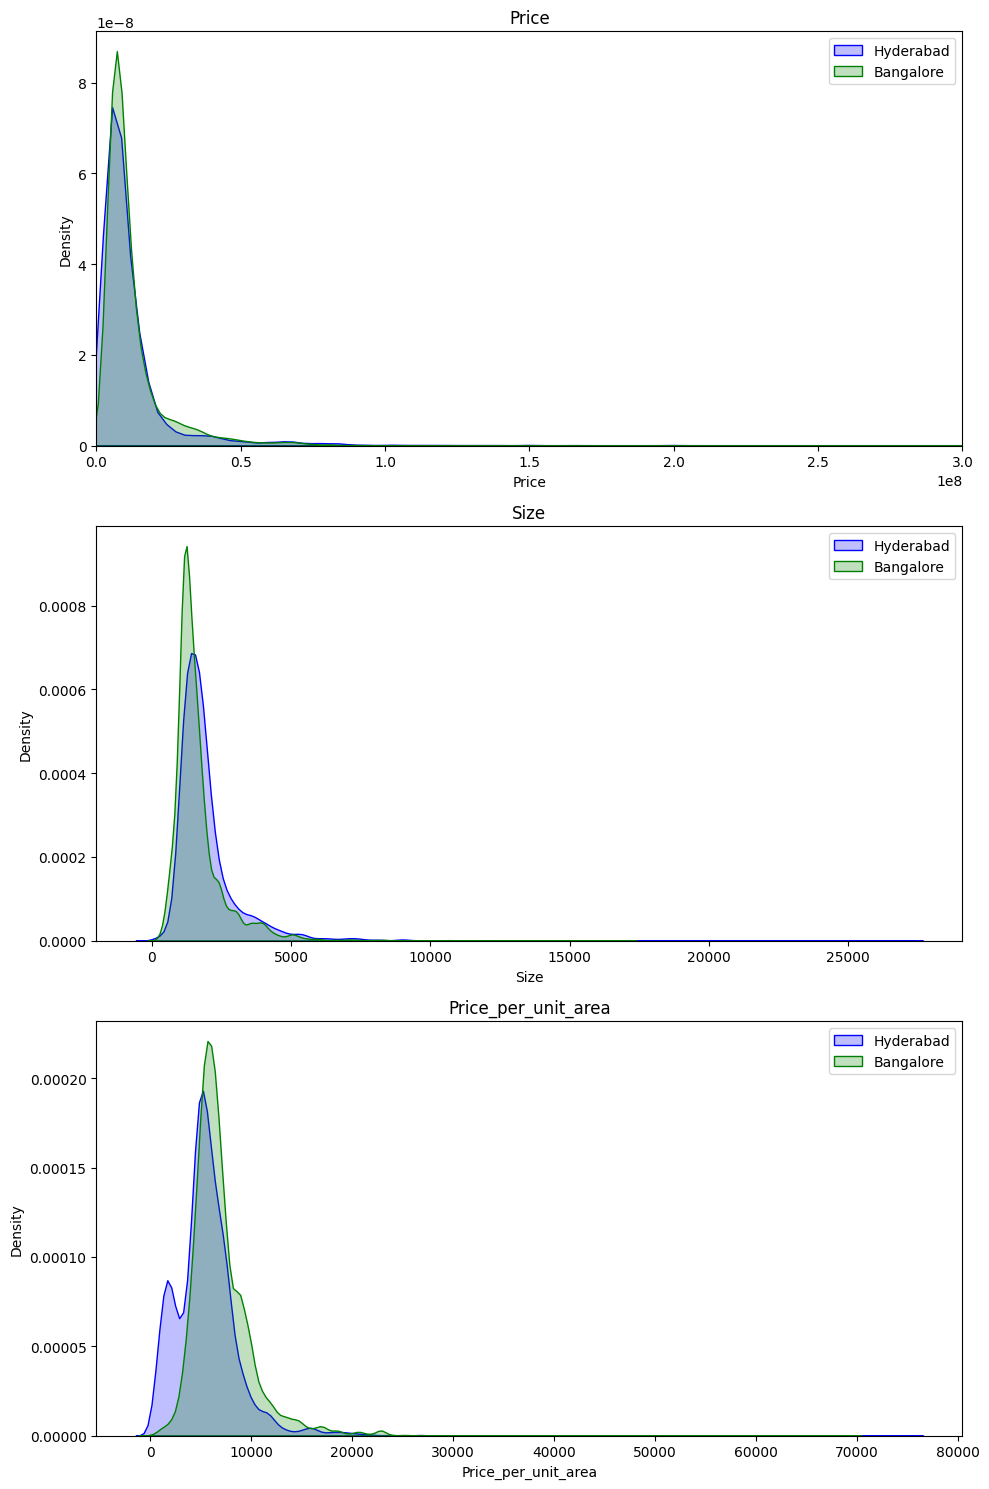

In [20]:
# sub plots
fig, ax = plt.subplots(3, 1, figsize=(10,15))

# plot 1
ax[0].set_title('Price')
sns.kdeplot(Hyderabad_df['Price'], color='blue', fill=True, ax=ax[0], label='Hyderabad')
sns.kdeplot(Bangalore_df['Price'], color='green', fill=True, ax=ax[0], label='Bangalore')
ax[0].set_xlim(0, 3 * 1e8)
ax[0].legend()

# plot 2
ax[1].set_title('Size')
sns.kdeplot(Hyderabad_df['Size'], color='blue', fill=True, ax=ax[1], label='Hyderabad')
sns.kdeplot(Bangalore_df['Size'], color='green', fill=True, ax=ax[1], label='Bangalore')
ax[1].legend()

# plot 3
ax[2].set_title('Price_per_unit_area')
sns.kdeplot(Hyderabad_df['Price_per_unit_area'], color='blue', fill=True, ax=ax[2], label='Hyderabad')
sns.kdeplot(Bangalore_df['Price_per_unit_area'], color='green', fill=True, ax=ax[2], label='Bangalore')
ax[2].legend()

plt.tight_layout()
plt.show()

---------------------------
--------------------------

<h2>Part 4</h2>
<p>Certain investors seek to compare investment oppurtunities in less expensive
and expensive localities within each city.(for instance : compare the avg size
of high budget houses in expensive localities and affordable localities ) : 20
Marks</p>

In [21]:
# pre processing str to float of cloumn Price_per_unit_area
df.loc[:,'Price_per_unit_area'] = pd.to_numeric(df['Price_per_unit_area'], errors='coerce')

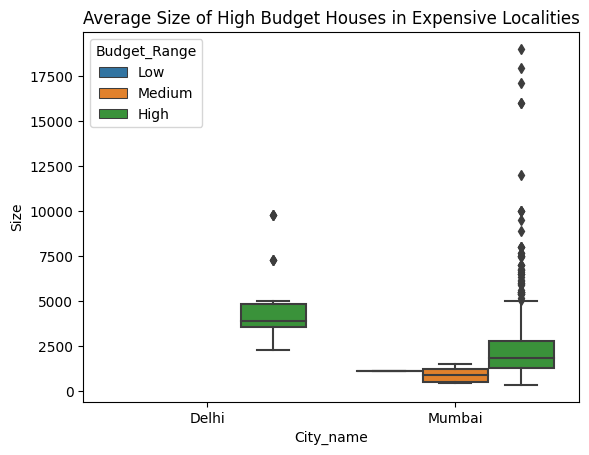

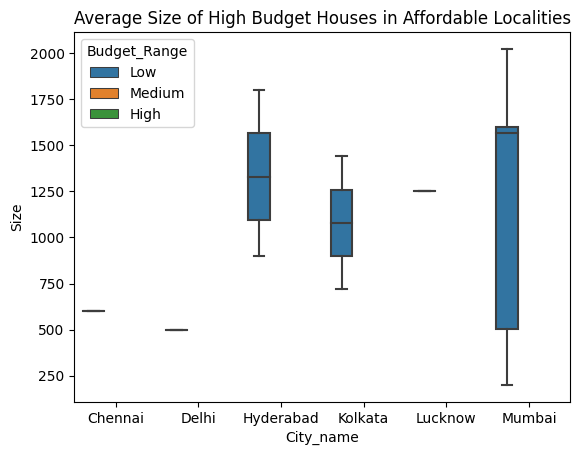

In [22]:
# Compare investment opportunities in less expensive and expensive localities within each city
expensive_localities = df.groupby('Locality_Name')['Price'].mean().sort_values(ascending=False).head(10).index
affordable_localities = df.groupby('Locality_Name')['Price'].mean().sort_values().head(10).index

expensive_properties = df[df['Locality_Name'].isin(expensive_localities)]
affordable_properties = df[df['Locality_Name'].isin(affordable_localities)]

# Plot for expensive properties
sns.boxplot(data=expensive_properties, x='City_name', y='Size', hue='Budget_Range')
plt.title('Average Size of High Budget Houses in Expensive Localities')
plt.show()

# Plot for affordable properties
sns.boxplot(data=affordable_properties, x='City_name', y='Size', hue='Budget_Range')
plt.title('Average Size of High Budget Houses in Affordable Localities')
plt.show()  
    

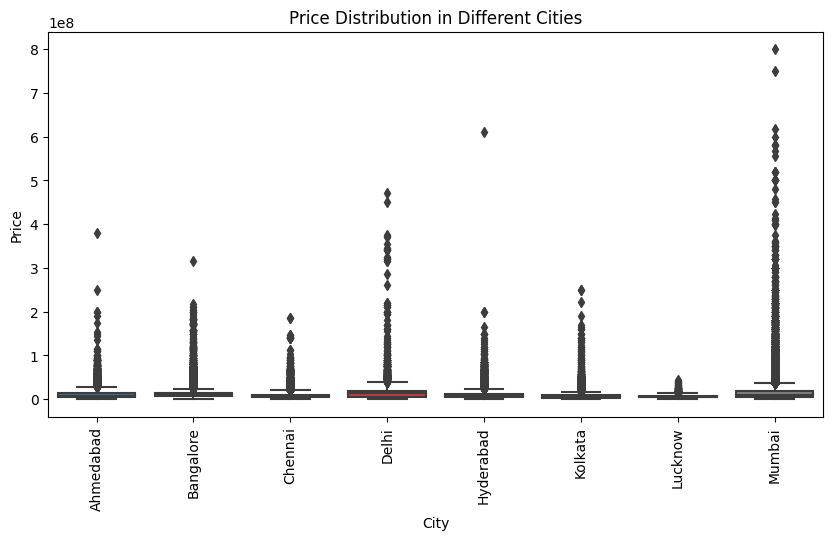

In [23]:
# Price Distribution in Different Cities
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='City_name', y='Price')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price Distribution in Different Cities')
plt.show()

---------------------------
--------------------------

<h2>Part 5</h2>
<p>Some prefer larger area properties with relatively lesser budgets(15 Marks)</p>

-------------------

we find the min_threshold_for_relative_large_area

In [24]:
# min size in a column
min_size = df['Size'].min()
max_size = df['Size'].max()
avg_size = df['Size'].mean()

print('Min size: ', min_size)
print('Max size: ', max_size)
print('Avg size: ', avg_size)

Min size:  100.0
Max size:  90000.0
Avg size:  1277.9332465833495


Choosing a size threshold

In [25]:
size_threshold = df['Size'].quantile(0.80)
                
filtered_df = df[(df['Size'] > size_threshold) & (df['Budget_Range'] == 'Low')]

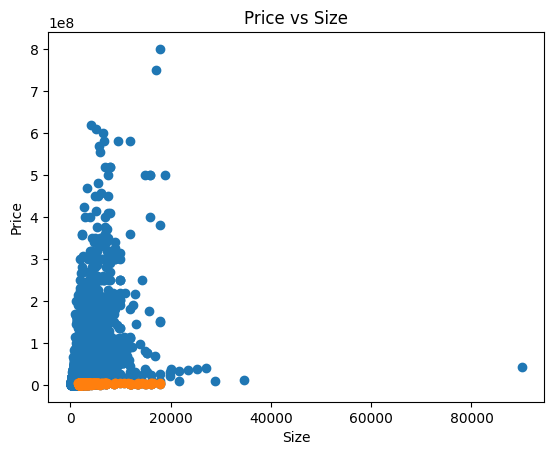

In [26]:
plt.scatter(df['Size'], df['Price'],alpha=1)
plt.scatter(filtered_df['Size'], filtered_df['Price'],alpha=1)

plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Price vs Size')
plt.show()


Now part chart for percentage of such properties in each city

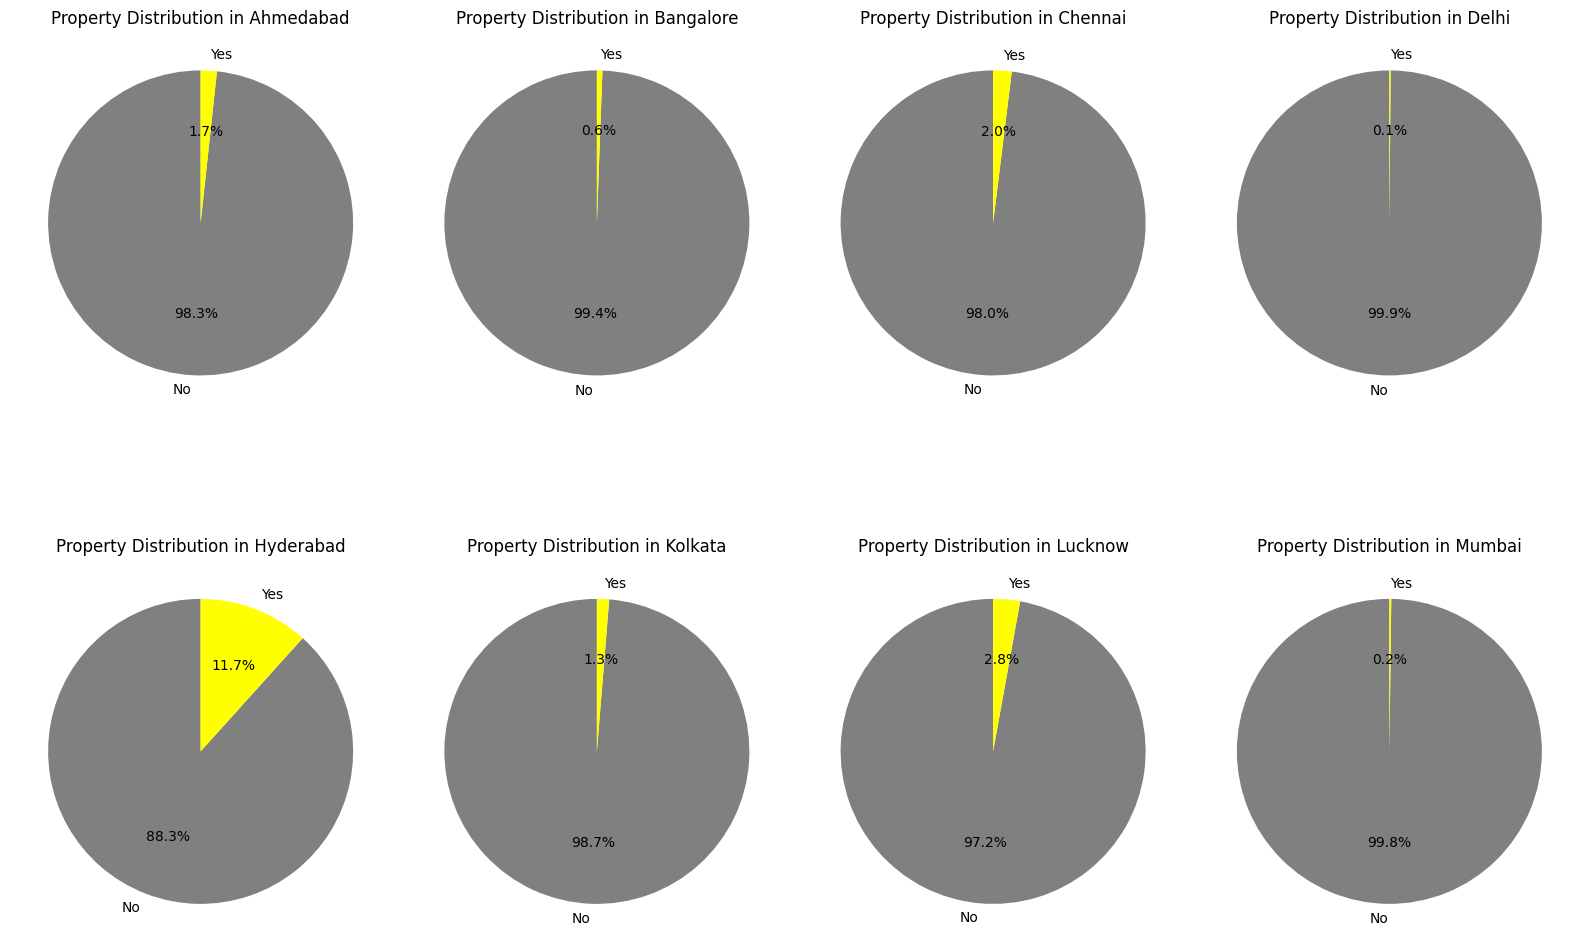

In [27]:
import numpy as np
import matplotlib.pyplot as plt

size_threshold = 1500  # Define your size threshold

# Get unique cities
unique_cities = df['City_name'].unique()

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Calculate the total number of subplots
num_subplots = num_rows * num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through cities and create pie charts for each
for i, city in enumerate(unique_cities):
    ax = axs[i]
    city_data = df[df['City_name'] == city].copy()  # Make a copy to avoid SettingWithCopyWarning
    
    # Create 'Interesting' column using np.where()
    city_data['Interesting'] = np.where((city_data['Size'] > size_threshold) & (city_data['Budget_Range'] == 'Low'), 'Yes', 'No')
    
    # Calculate counts for 'Interesting' values
    interesting_counts = city_data['Interesting'].value_counts()
    
    pie_colors = ['yellow' if x == 'Yes' else 'grey' for x in interesting_counts.index]
    
    ax.pie(interesting_counts, labels=interesting_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)    
    ax.set_title(f'Property Distribution in {city}')
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

---------------------------
--------------------------

<h2>Part 6</h2>
<p>Some investors are interested in knowing the hotspot for their offices in
Mumbai and Ahmedabad. : 25 Marks</p>

---------------------------
--------------------------

In [47]:
# Hotspot analysis for offices in Mumbai and Ahmedabad
mumbai_commercial = df[df['City_name'] == 'Mumbai']
ahmedabad_commercial = df[df['City_name'] == 'Ahmedabad']

# Convert the 'Price_per_unit_area' to numeric
mumbai_commercial.loc[:,'Price_per_unit_area'] = pd.to_numeric(mumbai_commercial['Price_per_unit_area'], errors='coerce')
ahmedabad_commercial.loc[:,'Price_per_unit_area'] = pd.to_numeric(ahmedabad_commercial['Price_per_unit_area'], errors='coerce')

In [52]:
# Calculate median Price_per_unit_area and median Longitude/Latitude for each locality
mumbai_hotspots = mumbai_commercial.groupby('Locality_Name').agg({
    'Price_per_unit_area': 'median',
    'Longitude': 'median',
    'Latitude': 'median',
    'longitude_deviation': '',
}).reset_index()

ahmedabad_hotspots = ahmedabad_commercial.groupby('Locality_Name').agg({
    'Price_per_unit_area': 'median',
    'Longitude': 'median',
    'Latitude': 'median'
}).reset_index()

# Convert the 'Price_per_unit_area' to numeric
mumbai_hotspots.loc[:,'Price_per_unit_area'] = pd.to_numeric(mumbai_hotspots['Price_per_unit_area'], errors='coerce')
ahmedabad_hotspots.loc[:,'Price_per_unit_area'] = pd.to_numeric(ahmedabad_hotspots['Price_per_unit_area'], errors='coerce')

# Get top 10 localities with highest median Price_per_unit_area
top_mumbai_hotspots = mumbai_hotspots.sort_values(by='Price_per_unit_area', ascending=False).head(10)
top_ahmedabad_hotspots = ahmedabad_hotspots.sort_values(by='Price_per_unit_area', ascending=False).head(10)


In [53]:
mumbai_hotspots.head()

,Locality_Name,Price_per_unit_area,Longitude,Latitude
0,Adaigaon,5475.0,73.128151,19.010754
1,Agasan Village,5879.0,73.062538,19.180958
2,Agripada,21794.0,72.825729,18.977615
3,Airoli,12727.0,72.994003,19.150377
4,Ambarnath,3928.0,73.186356,19.191851


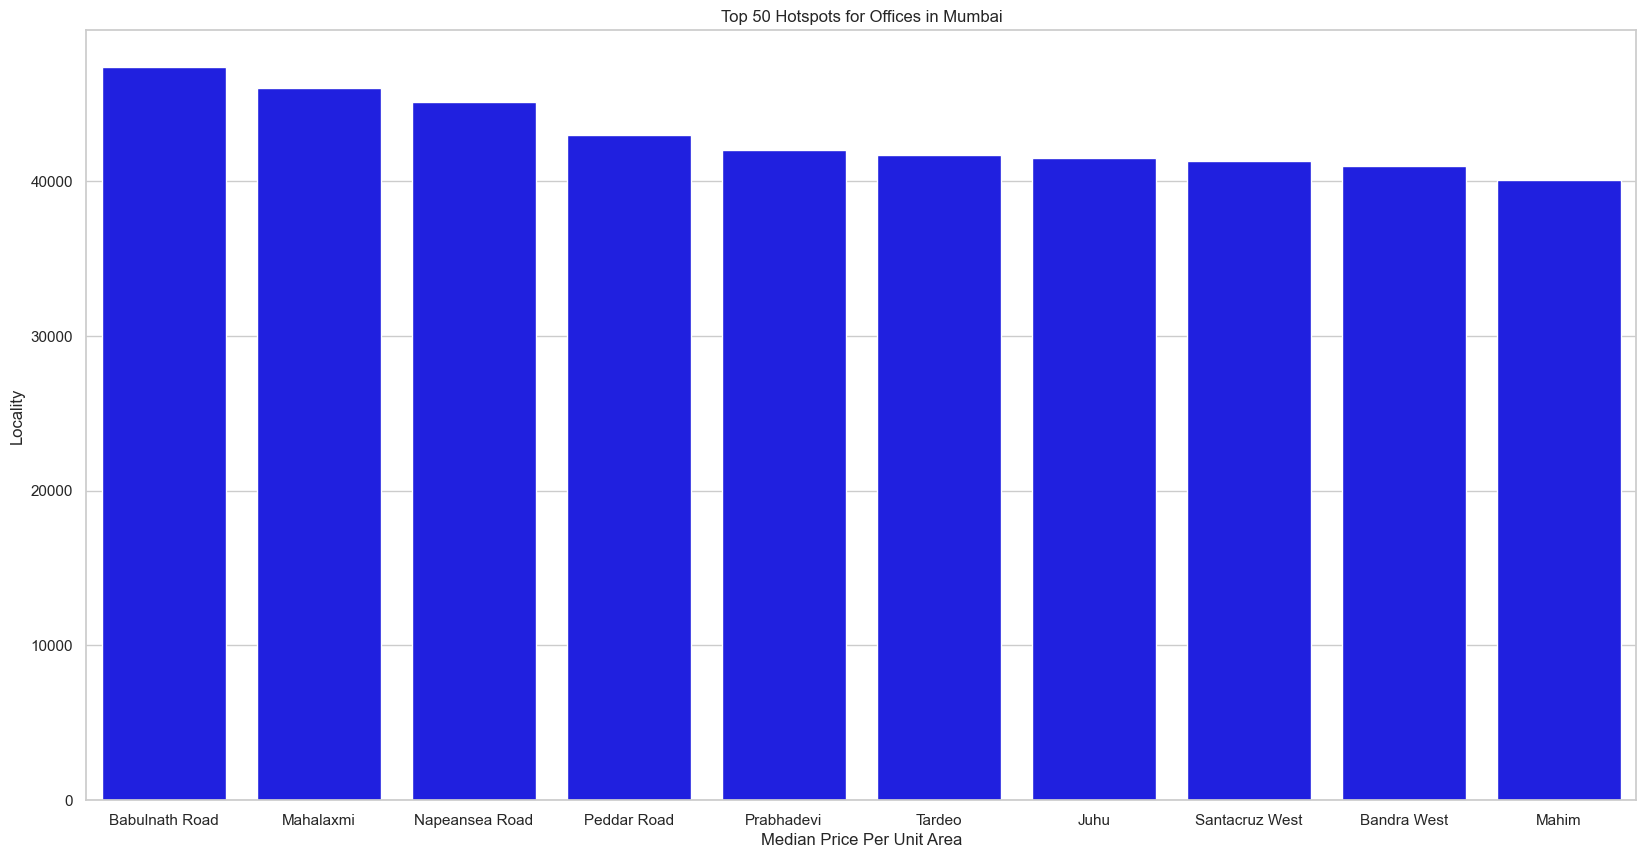

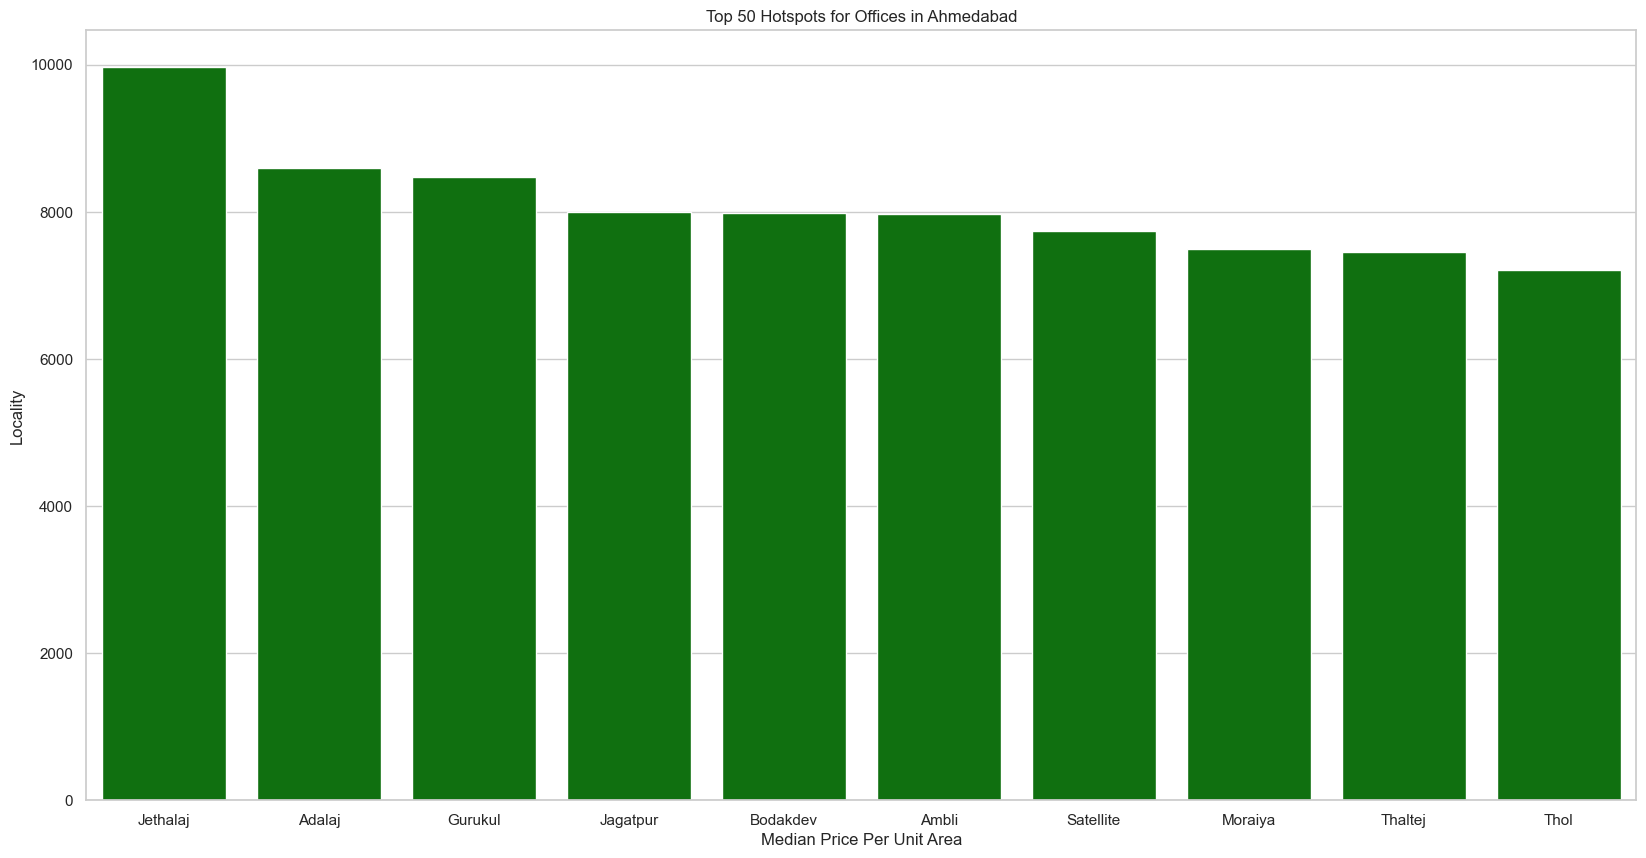

In [60]:
# Visualization for hotspots in Mumbai
plt.figure(figsize=(20, 10))
sns.barplot(y='Price_per_unit_area', x='Locality_Name', data=top_mumbai_hotspots, color='blue')
plt.xlabel('Median Price Per Unit Area')
plt.ylabel('Locality')
plt.title('Top 50 Hotspots for Offices in Mumbai')
plt.show()

# Visualization for hotspots in Ahmedabad
plt.figure(figsize=(20, 10))
sns.barplot(y='Price_per_unit_area', x='Locality_Name', data=top_ahmedabad_hotspots, color='green')
plt.xlabel('Median Price Per Unit Area')
plt.ylabel('Locality')
plt.title('Top 50 Hotspots for Offices in Ahmedabad')
plt.show()

Plotting the map of the localities in the city of Mumbai

In [114]:
# Create a map centered around the median latitude and longitude
center_latitude = top_mumbai_hotspots["Latitude"].median()
center_longitude = top_mumbai_hotspots["Longitude"].median()
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=12)

#title
title_html = '''
                <h4 align="center" style="font-size:20px"><b>Top 10 Localities in Mumbai</b></h4>
                '''
m.get_root().html.add_child(folium.Element(title_html))

# Add markers for top localities on the map
for index, row in top_mumbai_hotspots.iterrows():
    locality = row["Locality_Name"]
    avg_price = row["Price_per_unit_area"]
    latitude = row["Latitude"]
    longitude = row["Longitude"]
    
    popup_content = folium.Html(
        f"<div style='font-weight: bold;'>{locality}</div>"
        f"<div>Avg Price/Sq Unit: {avg_price:.2f}</div>",
        script=True
    )
    
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=index*2/10,
        # color changes with the index
        color = 'red',
        fill=True,
        fill_color='blue',
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(m)

m.save("mumbai_hotspots_map.html")
display(m)


Plotting the map of the localities in the city of Ahmedabad

In [113]:
# Create a map centered around the median latitude and longitude
center_latitude = top_ahmedabad_hotspots["Latitude"].median()
center_longitude = top_ahmedabad_hotspots["Longitude"].median()
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=11)

#title
title_html = '''
                <h4 align="center" style="font-size:20px"><b>Top 10 Localities in Ahmedabad</b></h4>
                '''
m.get_root().html.add_child(folium.Element(title_html))

# Add markers for top localities on the map
for index, row in top_ahmedabad_hotspots.iterrows():
    locality = row["Locality_Name"]
    avg_price = row["Price_per_unit_area"]
    latitude = row["Latitude"]
    longitude = row["Longitude"]
    
    popup_content = folium.Html(
        f"<div style='font-weight: bold;'>{locality}</div>"
        f"<div>Avg Price/Sq Unit: {avg_price:.2f}</div>",
        script=True
    )
    
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=(index + 100) / 10,
        # color changes with the index
        color = 'red',
        fill=True,
        fill_color='blue',
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(m)

m.save("mumbai_hotspots_map.html")
display(m)

--------------------------
--------------------------